# Chapter 3: synthetic data study
# Best results JME stabilizer


<div class="alert alert-success">
    
This Notebook contains the Code to produce Figures related to the Result comparison between conventional, ME standalone inversion and JME inversion.

In [1]:
# Importing pygimli
import  pygimli                 as     pg
import  pygimli.meshtools       as     mt
from    pygimli.physics         import ert
from    pygimli.physics         import TravelTimeManager
from    pygimli.viewer.mpl      import createColorBarOnly
from    JointEntropyClass       import JointEntropyInversion as JEI
from    PlotFunctions_Ch4       import *
# Importing auxiliary libraries
import  numpy                   as     np
import  matplotlib.pyplot       as     plt
import  sys


# Setting options
seed_val = 420
np.random.seed(seed_val)

path = 'C:/Users/anton.ziegon/Documents/GitHubRepos/Joint-Minimum-Entropy-Inversion-Paper/'

# Filenames
fn_ert_dd  = path+'Data/Synthetic/Synth_ert_dd.dat'
fn_tt      = path+'Data/Synthetic/Synth_tt.dat'

# Plotting
c_ert = 'gnuplot'
c_srt = 'viridis'
lim_ert = [5e1, 1e4]
ert_marks = [7e1, 7e3, 7e2]
ert_label = ['Square', 'Circle', 'Half-space']

lim_srt = [300, 4200]
srt_marks = [3e3, 2e3, 5e2, 4e3]
srt_label = ['Square', 'Circle', 'Layer 1', 'Layer 2']

## Geometry for Comparison

In [2]:
# Create layered subsurface
world = mt.createWorld([-35,-20], [35, 0], layers=[-13],marker=1)
# Create surface points for Diatreme
cube = mt.createRectangle(pos=[-8, -8], size=[9.0, 9.0],marker=3)
circ = mt.createCircle(pos=(8, -8), radius=4.5, nSegments=30,marker=4)
# Combine Diatreme and layered subsurface
geom = world + circ + cube

## Data and Inversion Mesh

In [3]:
# Loading ERT
ert_data = ert.load(fn_ert_dd)
ERT = ert.ERTManager(ert_data)

# Loading SRT
tt_data = pg.physics.traveltime.load(fn_tt)
SRT = TravelTimeManager(tt_data)

# inversion mesh
w = mt.createWorld([-65,-20], [65, 0])
for x in np.arange(-64,65,1):
    w.createNode([x,0])
invmesh = mt.createMesh(w,area=1.5)
extmesh = mt.appendTriangleBoundary(invmesh,xbound=100,ybound=100,marker=0)

In [4]:
# Reference models
refmod_ert = pg.Vector(invmesh.cellCount(), 700) # homogenous 700Ohmm
refmod_srt = pg.Vector(invmesh.cellCount(), 1/500) # homogenous 500m/s in slowness

# Conventional

In [5]:
v_est_con = SRT.invert(tt_data, mesh=invmesh, vTop=500, vBottom=4500, lam=9, secNodes=1, verbose=True, maxIter=30)
r_est_con = ERT.invert(ert_data, mesh = extmesh, lam=2, verbose=True)

23/04/24 - 09:53:55 - pyGIMLi - INFO - Found 1 regions.
23/04/24 - 09:53:55 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/04/24 - 09:53:55 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
23/04/24 - 09:53:56 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
23/04/24 - 09:53:56 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
23/04/24 - 09:53:56 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x0000015B7D3BF6D0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x0000015B7D3BF770>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000015B7D3BF720>
min/max (data): 0.0018/0.08
min/max (error): 0.96%/1.09%
min/max (start model): 2.2e-04/0.002
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 329.02 (dPhi = 79.52%) lam: 9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 213.44 (dPhi = 35.11%) lam: 9.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 95.72 (dPhi = 54.89%) lam: 9.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 52.16 (dPhi = 45.55%) lam: 9.0
--------------------------------

23/04/24 - 09:56:10 - pyGIMLi - INFO - Found 2 regions.
23/04/24 - 09:56:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
23/04/24 - 09:56:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/04/24 - 09:56:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/04/24 - 09:56:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368


chi² = 1.45 (dPhi = 7.14%) lam: 9.0


23/04/24 - 09:56:10 - pyGIMLi - INFO - Use median(data values)=619.288890298902
23/04/24 - 09:56:10 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
23/04/24 - 09:56:10 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000015B7D3BF400>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000015B7D3BF4F0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000015B7D3BF4A0>
min/max (data): 246/1117
min/max (error): 2.5%/2.62%
min/max (start model): 619/619
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 48.69 (dPhi = 80.35%) lam: 2
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.99 (dPhi = 95.79%) lam: 2.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 0.94 (dPhi = 50.9%) lam: 2.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.94)                   #
###############################

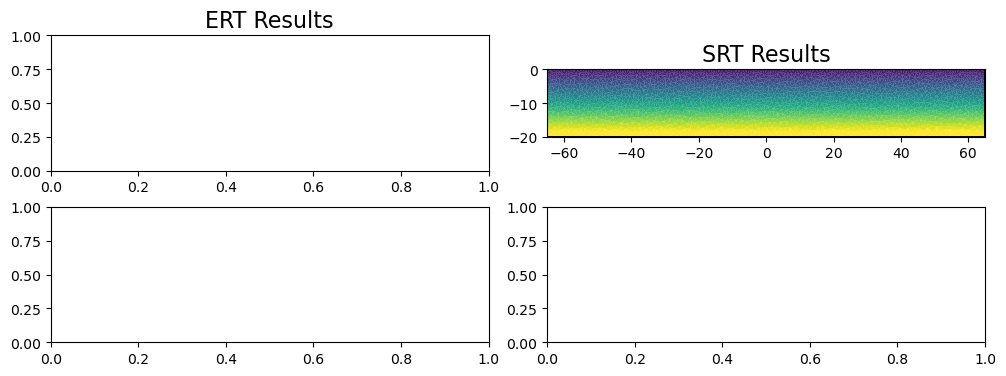

Text(0.5, 1.15, '    Conventional smoothness-constrained inversion')

In [6]:
v_start = 1/SRT.inv.startModel
r_start = ERT.inv.startModel

fig, ax, [cax1, cax2] = plotJointResultsComparison(invmesh, [r_start, r_est_con], [v_start, v_est_con],
                               c_ert, c_srt, lim_ert, lim_srt, label_list=['Start model', 'Result'], labels=True,
                               ert_marks=ert_marks, srt_marks=srt_marks, 
                               ert_label=ert_label, srt_label=srt_label, marks=True,
                               figsize=(10,3.5))

ax[0,0].set_title('ERT', fontsize=16)
ax[0,1].set_title('SRT', fontsize=16)

fig.suptitle(f'    Conventional smoothness-constrained inversion',fontsize=18, y=1.15)

# plt.savefig(path+'Figures/Ch-3/Conventional_results.pdf', bbox_inches='tight',dpi=600)

# Order q=1

In [7]:
q=1
beta = 1e-10

lam_ert = 3e-3
a_ert = 15

lam_srt = 5e-2
a_srt = 30

## ME

23/04/24 - 09:56:25 - pyGIMLi - INFO - Found 2 regions.
23/04/24 - 09:56:25 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
23/04/24 - 09:56:25 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/04/24 - 09:56:25 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/04/24 - 09:56:25 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
23/04/24 - 09:56:25 - pyGIMLi - INFO - Use median(data values)=619.288890298902


Starting Iteration 0...
... ERT


23/04/24 - 09:56:25 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]


Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=15
#####     ERT weighted misfit chi^2   = 4.77
#####     stabilizing functional    S = 1331.37
#####     joint weighted misfit chi^2 = 4.77
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=15
#####     ERT weighted misfit chi^2   = 1.11
#####     stabilizing functional    S = 19.66
#####     joint weighted misfit chi^2 = 1.11
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=15
#####     ERT weighted misfit chi^2   = 1.01
#####     stabilizing functional    S = 266.19
#####     joint weighted misfit chi^2 = 1.01
############################################################
       
Starting iteration 4...
Set JME weights for ERT with q=1, b=1e-10 and a=15
#####     ERT weighted misfit chi^2   = 0.99
#####     stabilizing functional    S

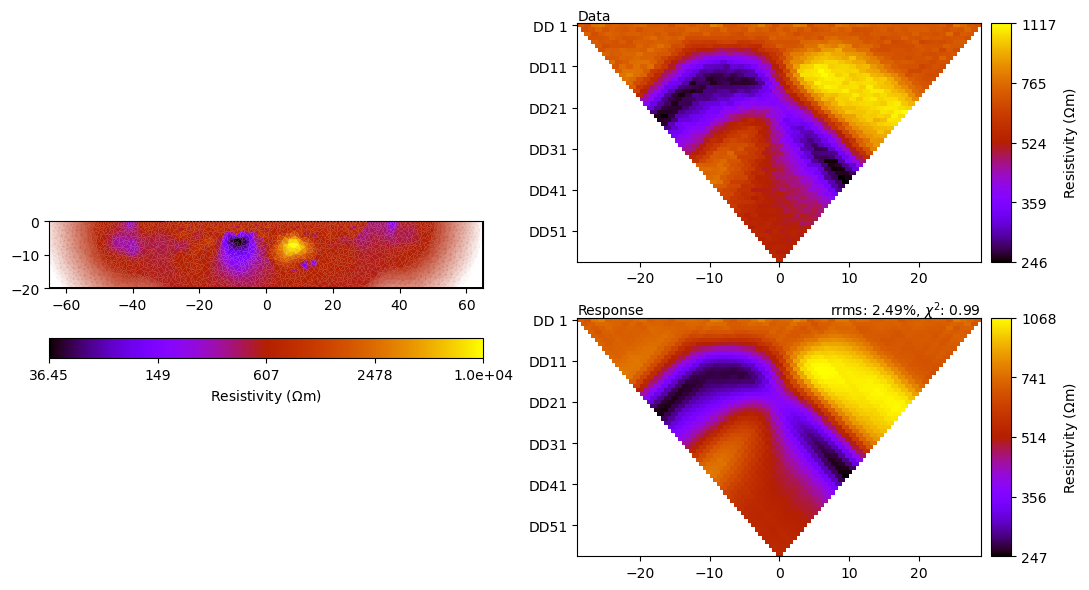

In [8]:
# ERT
a = a_ert
lam = lam_ert
beta = beta

ERT2 = ert.ERTManager(ert_data)
Je = JEI(mgr_list=[ERT2], data_list=[ert_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a)

KWe = dict(lam=lam, verbose=False)
Je.setKWInv([KWe])
Je.setNames(['ERT'])
Je.setMethodMesh(extmesh, 0)
Je.setReferenceModel([refmod_ert])

Je.runInversion('ME', maxIter=10, chi_limit=1)
ERT2.showResultAndFit(cMap=c_ert)

[r_est_me] = Je.getModels()


23/04/24 - 09:56:48 - pyGIMLi - INFO - Found 1 regions.
23/04/24 - 09:56:48 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/04/24 - 09:56:48 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
23/04/24 - 09:56:48 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
23/04/24 - 09:56:48 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]


Starting Iteration 0...
... SRT
Starting iteration 1...
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     SRT weighted misfit chi^2   = 104.91
#####     stabilizing functional    S = 1611.85
#####     joint weighted misfit chi^2 = 104.91
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     SRT weighted misfit chi^2   = 35.96
#####     stabilizing functional    S = 956.88
#####     joint weighted misfit chi^2 = 35.96
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     SRT weighted misfit chi^2   = 23.10
#####     stabilizing functional    S = 522.33
#####     joint weighted misfit chi^2 = 23.10
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     SRT weighted misfit chi^2   = 1

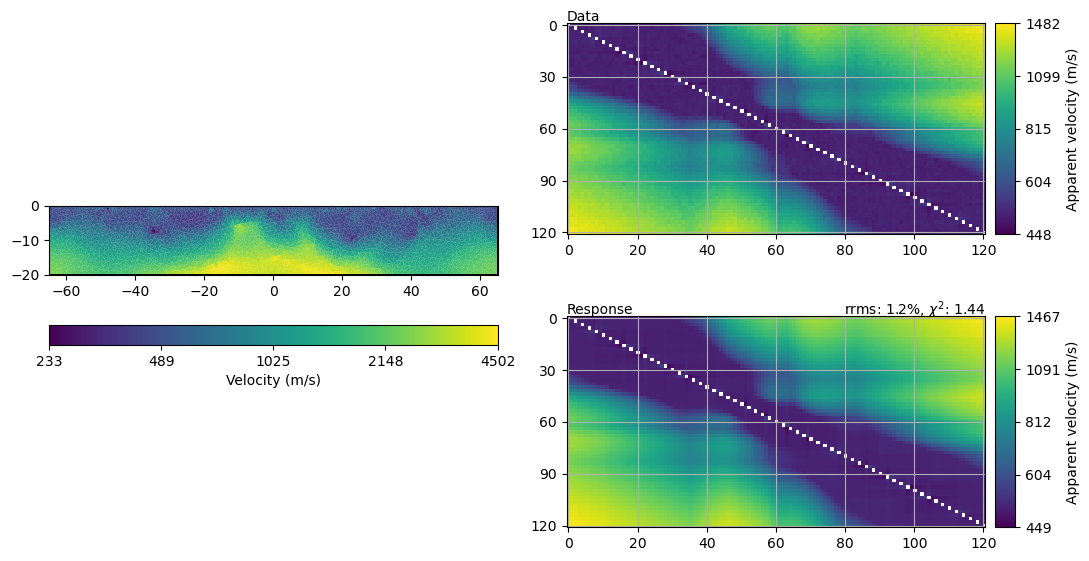

In [9]:
# SRT
a = a_srt
lam = lam_srt
beta = beta

SRT2 = TravelTimeManager(tt_data)
Js = JEI(mgr_list=[SRT2], data_list=[tt_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a)

KWs = dict(lam=lam, verbose=False, vTop=500, vBottom=4500, secNodes=1)
Js.setKWInv([KWs])
Js.setNames(['SRT'])

Js.setReferenceModel([refmod_srt])

Js.runInversion('ME', maxIter=20, chi_limit=1.5)
SRT2.inv.model = 1/SRT2.inv.model
SRT2.showResultAndFit(cMap=c_srt)

[v_est_me] = Js.getModels()

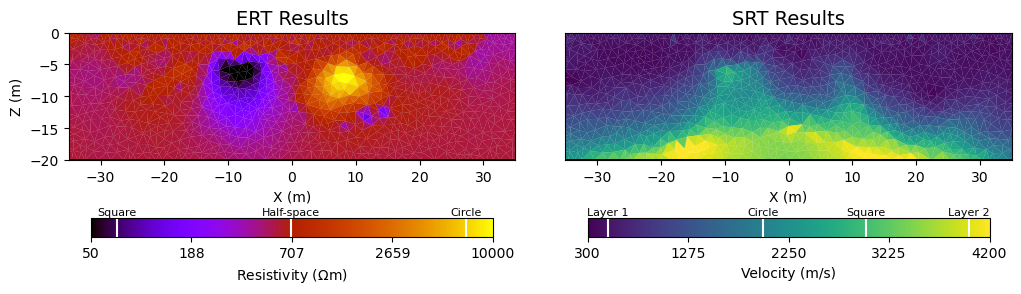

In [10]:
fig, ax, [cax1, cax2] = plotJointResultsComparison(invmesh, [r_est_me],  [v_est_me], 
                                                   c_ert, c_srt, lim_ert, lim_srt, ['no Sens'], labels=True,
                                                   ert_marks=ert_marks, srt_marks=srt_marks, 
                                                   ert_label=ert_label, srt_label=srt_label, marks=True)

## JME

23/04/24 - 09:58:06 - pyGIMLi - INFO - Found 2 regions.
23/04/24 - 09:58:06 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
23/04/24 - 09:58:06 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/04/24 - 09:58:06 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/04/24 - 09:58:06 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
23/04/24 - 09:58:06 - pyGIMLi - INFO - Use median(data values)=619.288890298902
23/04/24 - 09:58:06 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]


Starting Iteration 0...
... ERT
... SRT


23/04/24 - 09:58:13 - pyGIMLi - INFO - Found 1 regions.
23/04/24 - 09:58:13 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/04/24 - 09:58:13 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
23/04/24 - 09:58:13 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
23/04/24 - 09:58:13 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]


Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 5.23
#####     SRT weighted misfit chi^2   = 130.38
#####     stabilizing functional    S = 323.19
#####     joint weighted misfit chi^2 = 135.61
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 1.14
#####     SRT weighted misfit chi^2   = 63.59
#####     stabilizing functional    S = 944.84
#####     joint weighted misfit chi^2 = 64.73
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 1.03
#####     SRT weighted misfit chi^2   = 35.94
#####     stabilizing f

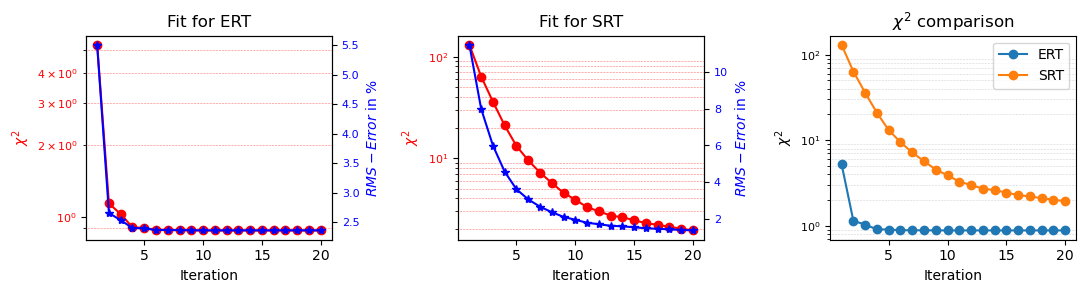

In [11]:
# Without weighting
a = [a_ert, a_srt]
lam = [lam_ert, lam_srt]
beta = beta
w1 = 1 # weight ert
w2 = 1 # weight srt

ERT3 = ert.ERTManager(ert_data)
SRT3 = TravelTimeManager(tt_data)
J1 = JEI(mgr_list=[ERT3,SRT3], data_list=[ert_data,tt_data], 
         mesh=invmesh, order=q, beta=beta,smooth_factor=a)

KWs = dict(lam=lam[1], verbose=False, vTop=500, vBottom=4500, secNodes=2)
KWe = dict(lam=lam[0], verbose=False)
J1.setMethodMesh(extmesh, 0)
J1.setKWInv([KWe, KWs])
J1.setNames(['ERT','SRT'])
J1.setMethodWeights([w1,w2])
J1.setReferenceModel([refmod_ert,refmod_srt])

J1.runInversion('ME', maxIter=20, breakup_criterion='all', chi_limit=1)
SRT3.inv.model = 1/SRT3.inv.model

[r_est_jme, v_est_jme] = J1.getModels()
    
J1.plotFitHistory()

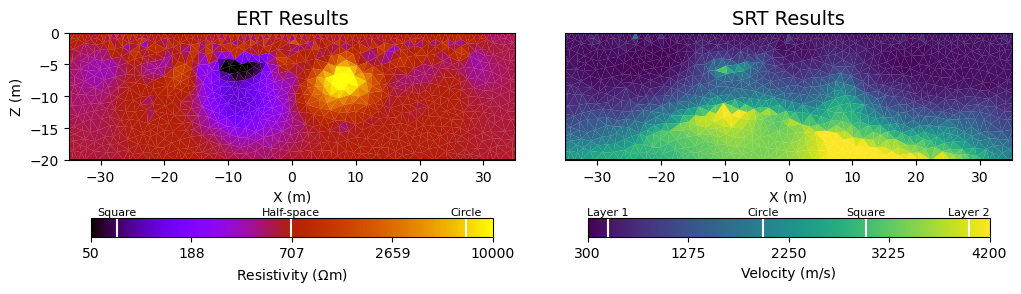

In [12]:
fig, ax, [cax1, cax2] = plotJointResultsComparison(invmesh, [r_est_jme],  [v_est_jme], 
                                                   c_ert, c_srt, lim_ert, lim_srt, ['no Sens'], labels=True,
                                                   ert_marks=ert_marks, srt_marks=srt_marks, 
                                                   ert_label=ert_label, srt_label=srt_label, marks=True)

23/04/24 - 10:03:21 - pyGIMLi - INFO - Found 2 regions.
23/04/24 - 10:03:21 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
23/04/24 - 10:03:21 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/04/24 - 10:03:21 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/04/24 - 10:03:22 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368


Starting Iteration 0...
... ERT


23/04/24 - 10:03:22 - pyGIMLi - INFO - Use median(data values)=619.288890298902
23/04/24 - 10:03:22 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
23/04/24 - 10:03:29 - pyGIMLi - INFO - Found 1 regions.
23/04/24 - 10:03:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/04/24 - 10:03:29 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
23/04/24 - 10:03:29 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
23/04/24 - 10:03:29 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]


... SRT
Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 5.26
#####     SRT weighted misfit chi^2   = 121.76
#####     stabilizing functional    S = 498.52
#####     joint weighted misfit chi^2 = 127.02
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 1.34
#####     SRT weighted misfit chi^2   = 55.87
#####     stabilizing functional    S = 842.24
#####     joint weighted misfit chi^2 = 57.21
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 0.95
#####     SRT weighted misfit chi^2   = 34.82
#####     stabi

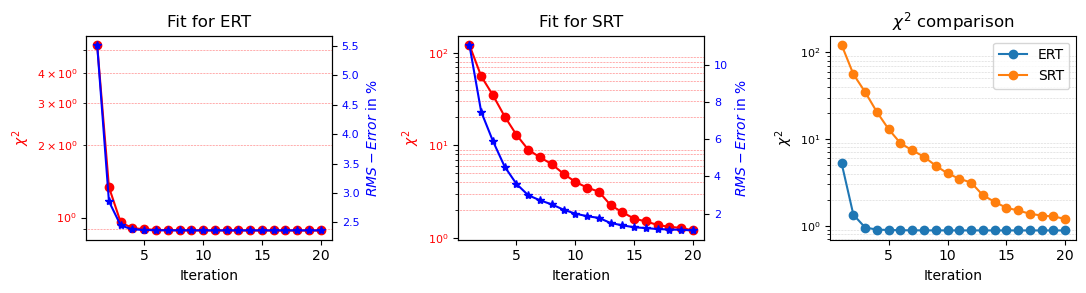

In [13]:
# With weighting
a = [a_ert, a_srt]
lam = [lam_ert, lam_srt]
beta = beta
w1 = 1 # weight ert
w2 = 5 # weight srt

ERT4 = ert.ERTManager(ert_data)
SRT4 = TravelTimeManager(tt_data)
J2 = JEI(mgr_list=[ERT4,SRT4], data_list=[ert_data,tt_data], 
         mesh=invmesh, order=q, beta=beta,smooth_factor=a)

KWs = dict(lam=lam[1], verbose=False, vTop=500, vBottom=4500, secNodes=2)
KWe = dict(lam=lam[0], verbose=False)
J2.setMethodMesh(extmesh, 0)
J2.setKWInv([KWe, KWs])
J2.setNames(['ERT','SRT'])
J2.setMethodWeights([w1,w2])
J2.setReferenceModel([refmod_ert,refmod_srt])

J2.runInversion('ME', maxIter=20, breakup_criterion='all', chi_limit=1)
SRT3.inv.model = 1/SRT3.inv.model

[r_est_jmew, v_est_jmew] = J2.getModels()

J2.plotFitHistory()

## Comparison Results

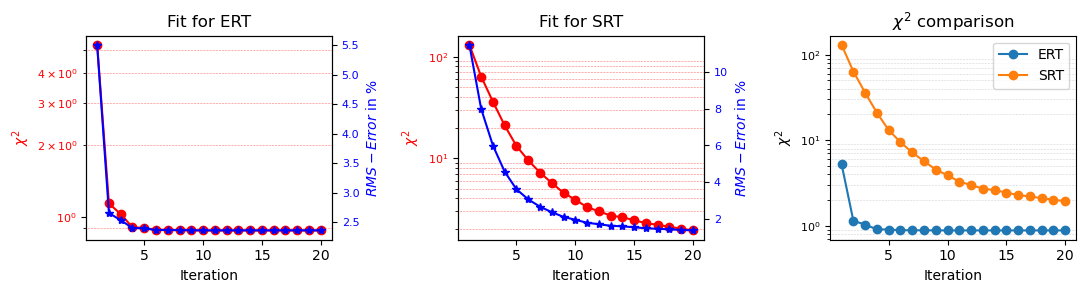

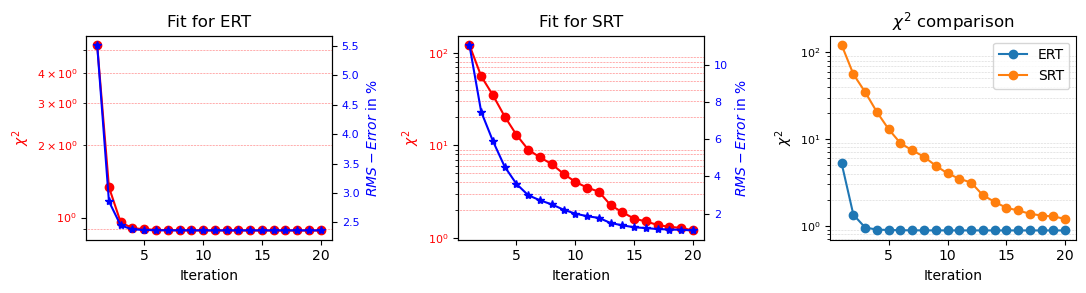

In [14]:
J1.plotFitHistory()
# plt.savefig(path+f'Figures/Ch-3/Conv_JME_{q}.pdf', bbox_inches='tight',dpi=600)
J2.plotFitHistory()
# plt.savefig(path+f'Figures/Ch-3/Conv_JMEweighted_{q}.pdf', bbox_inches='tight',dpi=600)

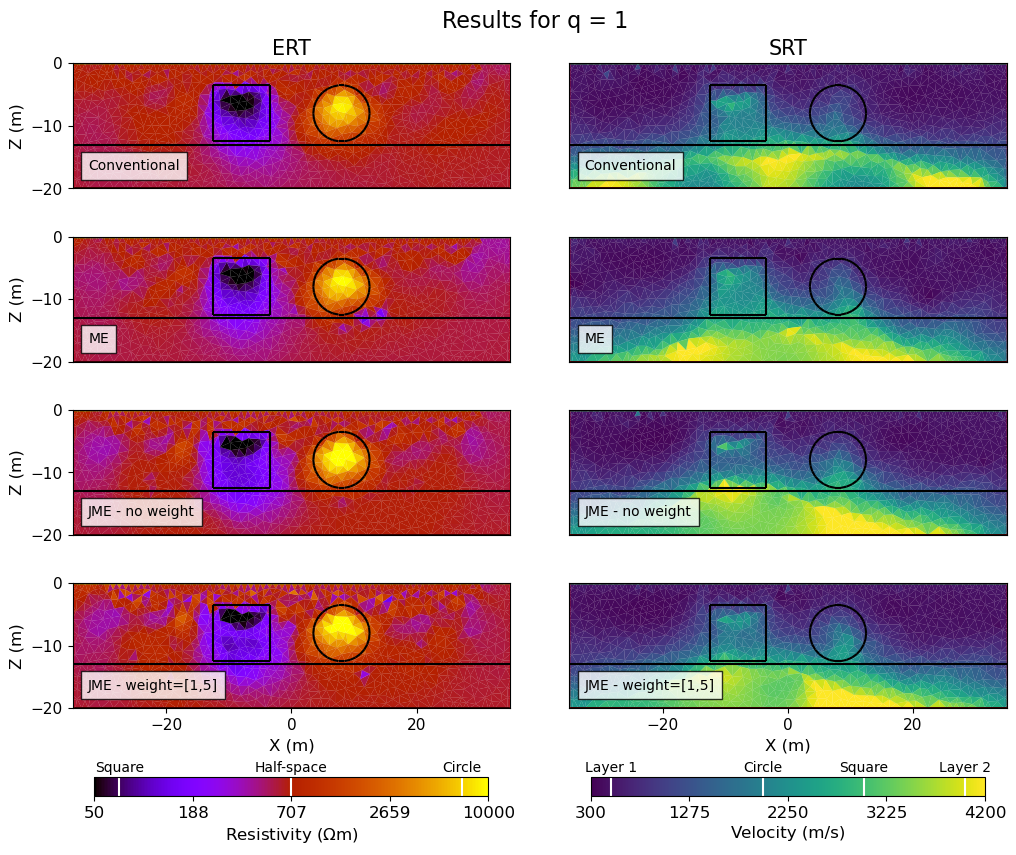

In [17]:
fig, ax, [cax1, cax2] = plotJointResultsComparison(invmesh, 
                                                   [r_est_con, r_est_me,r_est_jme,r_est_jmew], 
                                                   [v_est_con, v_est_me,v_est_jme,1/v_est_jmew], 
                                                   c_ert, c_srt, lim_ert, lim_srt, 
                                                   ['Conventional','ME','JME - no weight','JME - weight=[1,5]'], labels=True,
                                                   ert_marks=ert_marks, srt_marks=srt_marks, 
                                                   ert_label=ert_label, srt_label=srt_label, marks=True, 
                                                   figsize=(10,7))
for axis_ar in ax:
    for axis in axis_ar:
        pg.viewer.mpl.drawPLC(axis, geom, fillRegion=False)
        axis.set_xlim(-35,35)
        axis.set_ylim(-20,0)
fig.suptitle(f'Results for q = {q}',fontsize=16, x=0.51, y=1.05)
ax[0,0].set_title('ERT',fontsize=15)
ax[0,1].set_title('SRT',fontsize=15)
for a in ax[:,0]:
    a.set_ylabel('Z (m)', fontsize=12)
    a.set_yticks([-20,-10,0])
for a in ax[-1,:]:
    a.set_xlabel('X (m)', fontsize=12)
    a.set_xticks([-20,0,20])
    
cax2.set_xlabel(pg.unit('vel'), fontsize=12)
cax1.tick_params(labelsize=12)
cax1.set_xlabel(pg.unit('res'), fontsize=12)
cax2.tick_params(labelsize=12)

# plt.savefig(path+f'Figures/Ch-3/Best_results_comp_{q}.pdf', bbox_inches='tight', dpi=600)

## Comparison Misfit

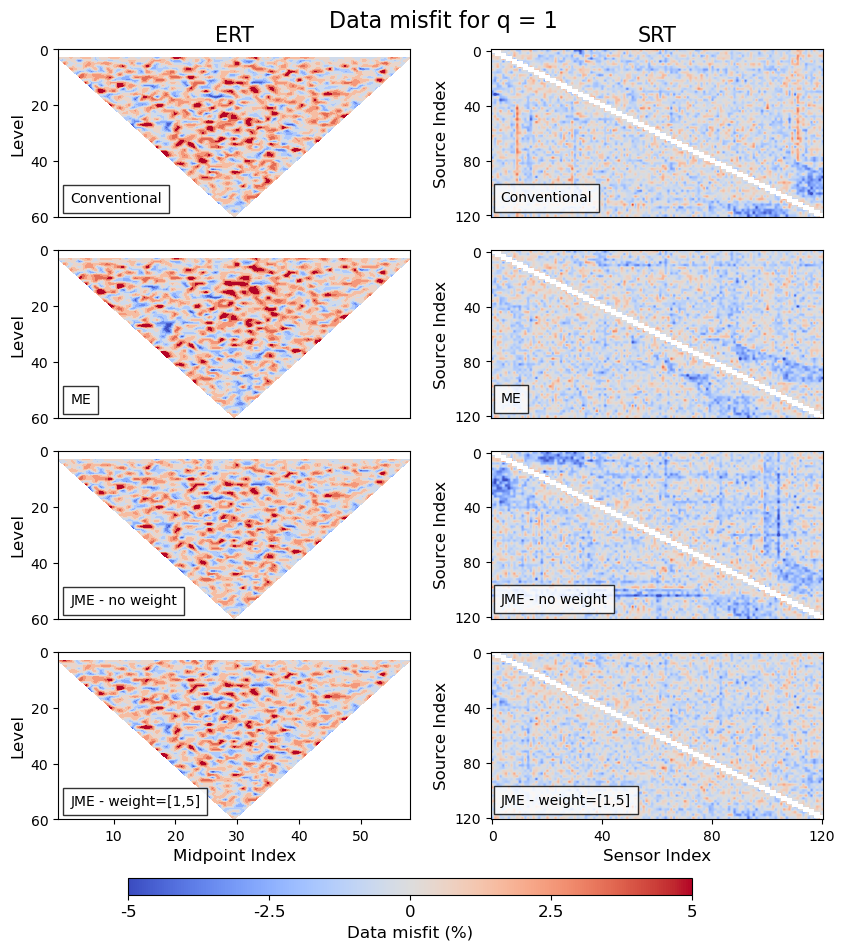

In [19]:
lim = [-5,5] # Misfit limits
label_list = ['Conventional','ME','JME - no weight','JME - weight=[1,5]']
srt_mgrs = [SRT,SRT2,SRT3,SRT4]
ert_resp = [m.inv.response.array() for m in [ERT,ERT2,ERT3,ERT4]]

cmap='coolwarm'

fig, ax = plt.subplots(4,2, figsize=(10,10))

for i in range(4):
    # Plot misfits
    e_misfit =  100*(ert_data['rhoa'].array()-ert_resp[i])/ert_data['rhoa'].array()
    showPseudosections(ert_data, e_misfit, [0,len(ert_data['a'])], 1, ax=ax[i,0], clim=lim, cmap=cmap, Type='misfit', 
                       annotation=False, colorBar=False)
    
    showTTMatrix(srt_mgrs[i], 'misfit', ax[i,1], lim=lim, cmap=cmap, colorBar=False)
    
    # Add labels
    for axis in [ax[i,0],ax[i,1]]:
        axis.text(3, 55, label_list[i], fontsize=10, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

# Adjust axes
for ax_ar in ax[:-1,:]:
    for axis in ax_ar:
        axis.set_xticks([])  
        axis.set_xlabel('')

# Add colorbar
cax = ax[-1,0].inset_axes([0.2, -0.45, 1.6, 0.1])
createColorBarOnly(ax=cax, cMin=lim[0], cMax=lim[1], logScale=False,cMap=cmap,
                   label='Data misfit (%)', orientation='horizontal')
cax.set_xlabel('Data misfit (%)', fontsize=12)
cax.tick_params(labelsize=12)

fig.suptitle(f'Data misfit for q = {q}',fontsize=16, x=.51, y=.92)
ax[0,0].set_title('ERT',fontsize=15)
ax[0,1].set_title('SRT',fontsize=15)

for a in ax[:,0]:
    a.set_ylabel('Level', fontsize=12)
    a.set_yticks([0,20,40,60])
    
for a in ax[:,1]:
    a.set_ylabel('Source Index', fontsize=12)
    
ax[-1,0].set_xlabel('Midpoint Index', fontsize=12)
ax[-1,1].set_xlabel('Sensor Index', fontsize=12)
ax[-1,1].set_xticks([0,40,80,120])
# plt.savefig(path+f'Figures/Ch-3/Best_misfit_comp_{q}.pdf', bbox_inches='tight',dpi=600)

## Order q=2

In [20]:
q=2

## ME

23/04/24 - 11:08:35 - pyGIMLi - INFO - Found 2 regions.
23/04/24 - 11:08:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
23/04/24 - 11:08:35 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/04/24 - 11:08:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/04/24 - 11:08:35 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
23/04/24 - 11:08:35 - pyGIMLi - INFO - Use median(data values)=619.288890298902
23/04/24 - 11:08:35 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]


Starting Iteration 0...
... ERT
Starting iteration 1...
Set JME weights for ERT with q=2, b=1e-10 and a=15
#####     ERT weighted misfit chi^2   = 4.84
#####     stabilizing functional    S = 6.35
#####     joint weighted misfit chi^2 = 4.84
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=2, b=1e-10 and a=15
#####     ERT weighted misfit chi^2   = 1.10
#####     stabilizing functional    S = 5.56
#####     joint weighted misfit chi^2 = 1.10
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=2, b=1e-10 and a=15
#####     ERT weighted misfit chi^2   = 0.92
#####     stabilizing functional    S = 5.23
#####     joint weighted misfit chi^2 = 0.92
############################################################
       
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
          joint chi^2 < 1.00         
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

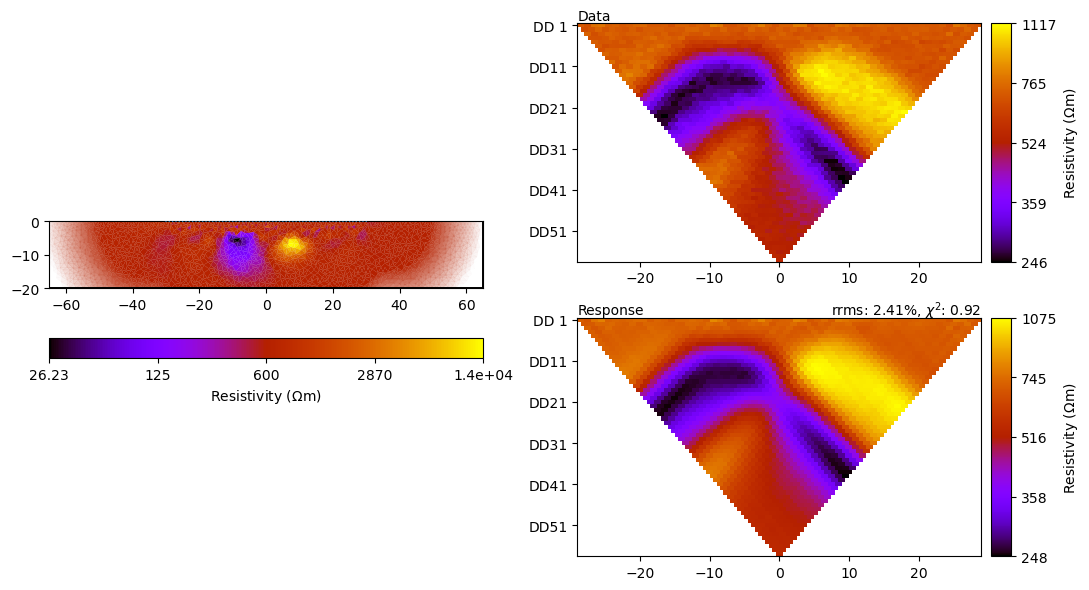

In [21]:
# ERT
a = a_ert
lam = lam_ert
beta = beta

ERT2 = ert.ERTManager(ert_data)
Je = JEI(mgr_list=[ERT2], data_list=[ert_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a)

KWe = dict(lam=lam, verbose=False)
Je.setKWInv([KWe])
Je.setNames(['ERT'])
Je.setMethodMesh(extmesh, 0)
Je.setReferenceModel([refmod_ert])

Je.runInversion('ME', maxIter=10, chi_limit=1)
ERT2.showResultAndFit(cMap=c_ert)

[r_est_me] = Je.getModels()

23/04/24 - 11:08:55 - pyGIMLi - INFO - Found 1 regions.
23/04/24 - 11:08:55 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/04/24 - 11:08:55 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
23/04/24 - 11:08:55 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
23/04/24 - 11:08:55 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]


Starting Iteration 0...
... SRT
Starting iteration 1...
Set JME weights for SRT with q=2, b=1e-10 and a=30
#####     SRT weighted misfit chi^2   = 155.57
#####     stabilizing functional    S = 16.11
#####     joint weighted misfit chi^2 = 155.57
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=2, b=1e-10 and a=30
#####     SRT weighted misfit chi^2   = 78.04
#####     stabilizing functional    S = 2.20
#####     joint weighted misfit chi^2 = 78.04
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=2, b=1e-10 and a=30
#####     SRT weighted misfit chi^2   = 45.73
#####     stabilizing functional    S = 50.11
#####     joint weighted misfit chi^2 = 45.73
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=2, b=1e-10 and a=30
#####     SRT weighted misfit chi^2   = 34.57


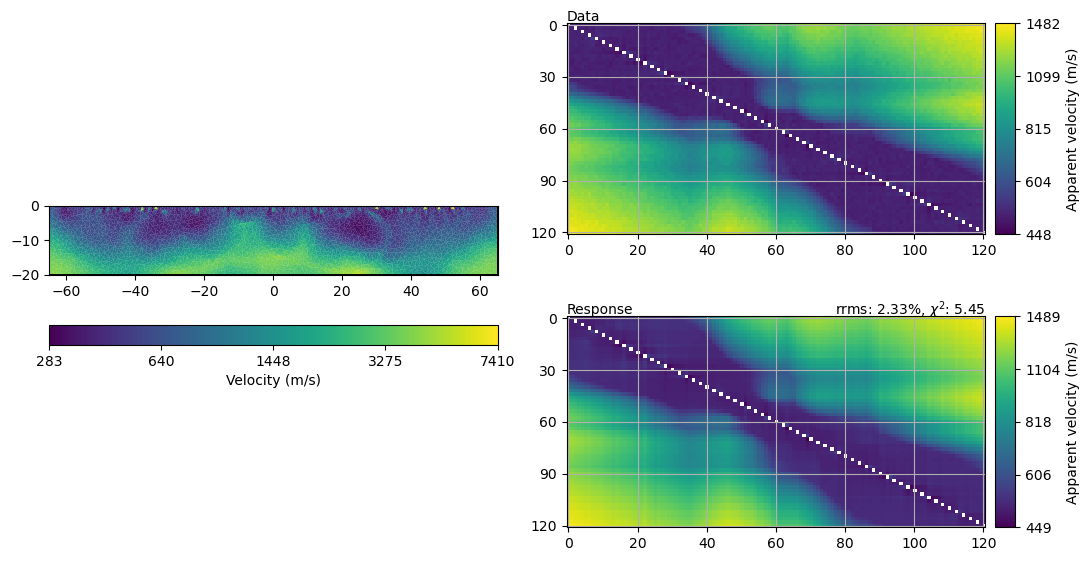

In [22]:
# SRT
a = a_srt
lam = lam_srt
beta = beta

SRT2 = TravelTimeManager(tt_data)
Js = JEI(mgr_list=[SRT2], data_list=[tt_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a)

KWs = dict(lam=lam, verbose=False, vTop=500, vBottom=4500, secNodes=1)
Js.setKWInv([KWs])
Js.setNames(['SRT'])
Js.setReferenceModel([refmod_srt])

Js.runInversion('ME', maxIter=20, chi_limit=1.5)
SRT2.inv.model = 1/SRT2.inv.model
SRT2.showResultAndFit(cMap=c_srt)

[v_est_me] = Js.getModels()

## JME

In [23]:
# Without weighting
a = [a_ert, a_srt]
lam = [lam_ert, lam_srt]
beta = beta
w1 = 1 # weight ert
w2 = 1 # weight srt

ERT3 = ert.ERTManager(ert_data)
SRT3 = TravelTimeManager(tt_data)
J1 = JEI(mgr_list=[ERT3,SRT3], data_list=[ert_data,tt_data], 
         mesh=invmesh, order=q, beta=beta,smooth_factor=a)

KWs = dict(lam=lam[1], verbose=False, vTop=500, vBottom=4500, secNodes=2)
KWe = dict(lam=lam[0], verbose=False)
J1.setMethodMesh(extmesh, 0)
J1.setKWInv([KWe, KWs])
J1.setNames(['ERT','SRT'])
J1.setMethodWeights([w1,w2])
J1.setReferenceModel([refmod_ert,refmod_srt])

J1.runInversion('ME', maxIter=20, breakup_criterion='all', chi_limit=1)
SRT3.inv.model = 1/SRT3.inv.model

[r_est_jme, v_est_jme] = J1.getModels()
    
# J1.plotFitHistory()

23/04/24 - 11:10:50 - pyGIMLi - INFO - Found 2 regions.
23/04/24 - 11:10:50 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
23/04/24 - 11:10:50 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/04/24 - 11:10:50 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/04/24 - 11:10:50 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
23/04/24 - 11:10:50 - pyGIMLi - INFO - Use median(data values)=619.288890298902
23/04/24 - 11:10:50 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]


Starting Iteration 0...
... ERT


23/04/24 - 11:10:58 - pyGIMLi - INFO - Found 1 regions.
23/04/24 - 11:10:58 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/04/24 - 11:10:58 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
23/04/24 - 11:10:58 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
23/04/24 - 11:10:58 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]


... SRT
Starting iteration 1...
Set JME weights for ERT with q=2, b=1e-10 and a=15
Set JME weights for SRT with q=2, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 5.62
#####     SRT weighted misfit chi^2   = 189.69
#####     stabilizing functional    S = 4.11
#####     joint weighted misfit chi^2 = 195.32
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=2, b=1e-10 and a=15
Set JME weights for SRT with q=2, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 1.32
#####     SRT weighted misfit chi^2   = 79.99
#####     stabilizing functional    S = 11.97
#####     joint weighted misfit chi^2 = 81.31
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=2, b=1e-10 and a=15
Set JME weights for SRT with q=2, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 0.98
#####     SRT weighted misfit chi^2   = 37.59
#####     stabiliz

In [24]:
# With weighting
a = [a_ert, a_srt]
lam = [lam_ert, lam_srt]
beta = beta
w1 = 1 # weight ert
w2 = 5 # weight srt

ERT4 = ert.ERTManager(ert_data)
SRT4 = TravelTimeManager(tt_data)
J2 = JEI(mgr_list=[ERT4,SRT4], data_list=[ert_data,tt_data], 
         mesh=invmesh, order=q, beta=beta,smooth_factor=a)

KWs = dict(lam=lam[1], verbose=False, vTop=500, vBottom=4500, secNodes=2)
KWe = dict(lam=lam[0], verbose=False)
J2.setMethodMesh(extmesh, 0)
J2.setKWInv([KWe, KWs])
J2.setNames(['ERT','SRT'])
J2.setMethodWeights([w1,w2])
J2.setReferenceModel([refmod_ert,refmod_srt])

J2.runInversion('ME', maxIter=20, breakup_criterion='all', chi_limit=1)
SRT3.inv.model = 1/SRT3.inv.model

[r_est_jmew, v_est_jmew] = J2.getModels()

# J2.plotFitHistory()

23/04/24 - 11:17:15 - pyGIMLi - INFO - Found 2 regions.


Starting Iteration 0...
... ERT


23/04/24 - 11:17:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
23/04/24 - 11:17:15 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/04/24 - 11:17:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/04/24 - 11:17:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
23/04/24 - 11:17:15 - pyGIMLi - INFO - Use median(data values)=619.288890298902
23/04/24 - 11:17:15 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]


... SRT


23/04/24 - 11:17:22 - pyGIMLi - INFO - Found 1 regions.
23/04/24 - 11:17:22 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/04/24 - 11:17:22 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
23/04/24 - 11:17:22 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
23/04/24 - 11:17:22 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]


Starting iteration 1...
Set JME weights for ERT with q=2, b=1e-10 and a=15
Set JME weights for SRT with q=2, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 6.25
#####     SRT weighted misfit chi^2   = 183.94
#####     stabilizing functional    S = 3.81
#####     joint weighted misfit chi^2 = 190.19
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=2, b=1e-10 and a=15
Set JME weights for SRT with q=2, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 1.44
#####     SRT weighted misfit chi^2   = 83.40
#####     stabilizing functional    S = 14.30
#####     joint weighted misfit chi^2 = 84.84
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=2, b=1e-10 and a=15
Set JME weights for SRT with q=2, b=1e-10 and a=30
#####     ERT weighted misfit chi^2   = 1.05
#####     SRT weighted misfit chi^2   = 48.37
#####     stabilizing func

## Comparison Results

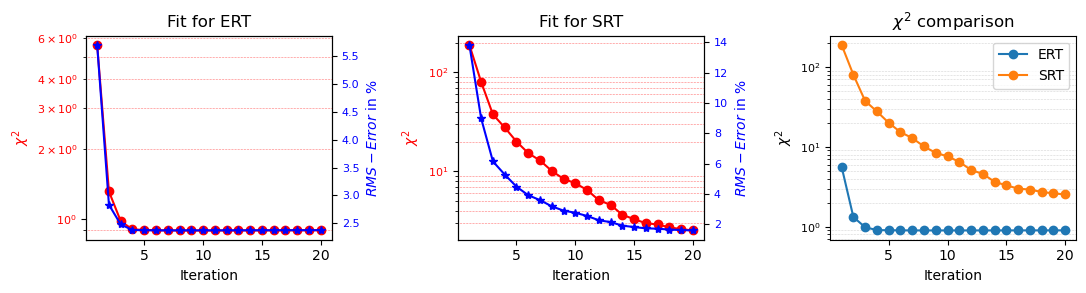

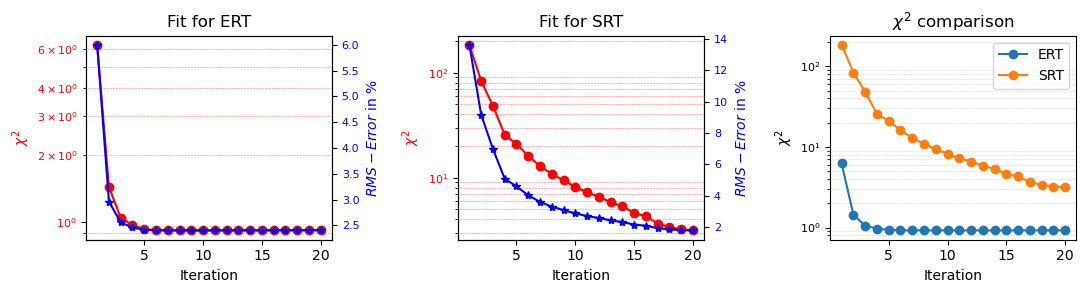

In [25]:
J1.plotFitHistory()
# plt.savefig(path+f'Figures/Ch-3/Conv_JME_{q}.pdf', bbox_inches='tight',dpi=600)
J2.plotFitHistory()
# plt.savefig(path+f'Figures/Ch-3/Conv_JMEweighted_{q}.pdf', bbox_inches='tight',dpi=600)

C:\Users\anton.ziegon\Documents\GitHubRepos\Joint-Minimum-Entropy-Inversion-Paper\Code\PlotFunctions_Ch4.py:291: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylab)


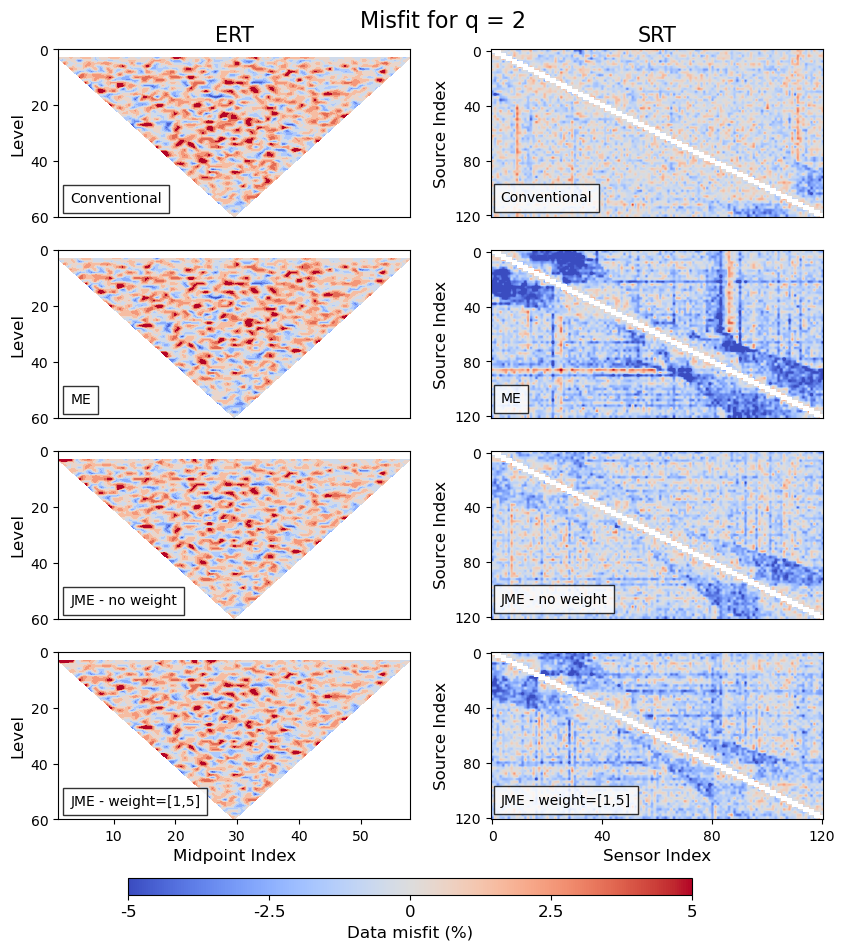

In [26]:
lim = [-5,5] # Misfit limits
label_list = ['Conventional','ME','JME - no weight','JME - weight=[1,5]']
srt_mgrs = [SRT,SRT2,SRT3,SRT4]
ert_resp = [m.inv.response.array() for m in [ERT,ERT2,ERT3,ERT4]]

cmap='coolwarm'

fig, ax = plt.subplots(4,2, figsize=(10,10))

for i in range(4):
    # Plot misfits
    e_misfit =  100*(ert_data['rhoa'].array()-ert_resp[i])/ert_data['rhoa'].array()
    showPseudosections(ert_data, e_misfit, [0,len(ert_data['a'])], 1, ax=ax[i,0], clim=lim, cmap=cmap, Type='misfit', 
                       annotation=False, colorBar=False)
    
    showTTMatrix(srt_mgrs[i], 'misfit', ax[i,1], lim=lim, cmap=cmap, colorBar=False)
    
    # Add labels
    for axis in [ax[i,0],ax[i,1]]:
        axis.text(3, 55, label_list[i], fontsize=10, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

# Adjust axes
for ax_ar in ax[:-1,:]:
    for axis in ax_ar:
        axis.set_xticks([])  
        axis.set_xlabel('')

# Add colorbar
cax = ax[-1,0].inset_axes([0.2, -0.45, 1.6, 0.1])
createColorBarOnly(ax=cax, cMin=lim[0], cMax=lim[1], logScale=False,cMap=cmap,
                   label='Data misfit (%)', orientation='horizontal')
cax.set_xlabel('Data misfit (%)', fontsize=12)
cax.tick_params(labelsize=12)

fig.suptitle(f'Misfit for q = {q}',fontsize=16, x=.51, y=.92)
ax[0,0].set_title('ERT',fontsize=15)
ax[0,1].set_title('SRT',fontsize=15)

for a in ax[:,0]:
    a.set_ylabel('Level', fontsize=12)
    a.set_yticks([0,20,40,60])
    
for a in ax[:,1]:
    a.set_ylabel('Source Index', fontsize=12)
    
ax[-1,0].set_xlabel('Midpoint Index', fontsize=12)
ax[-1,1].set_xlabel('Sensor Index', fontsize=12)
ax[-1,1].set_xticks([0,40,80,120])
plt.savefig(path+f'Figures/Ch-3/Best_misfit_comp_{q}.pdf', bbox_inches='tight', dpi=600)

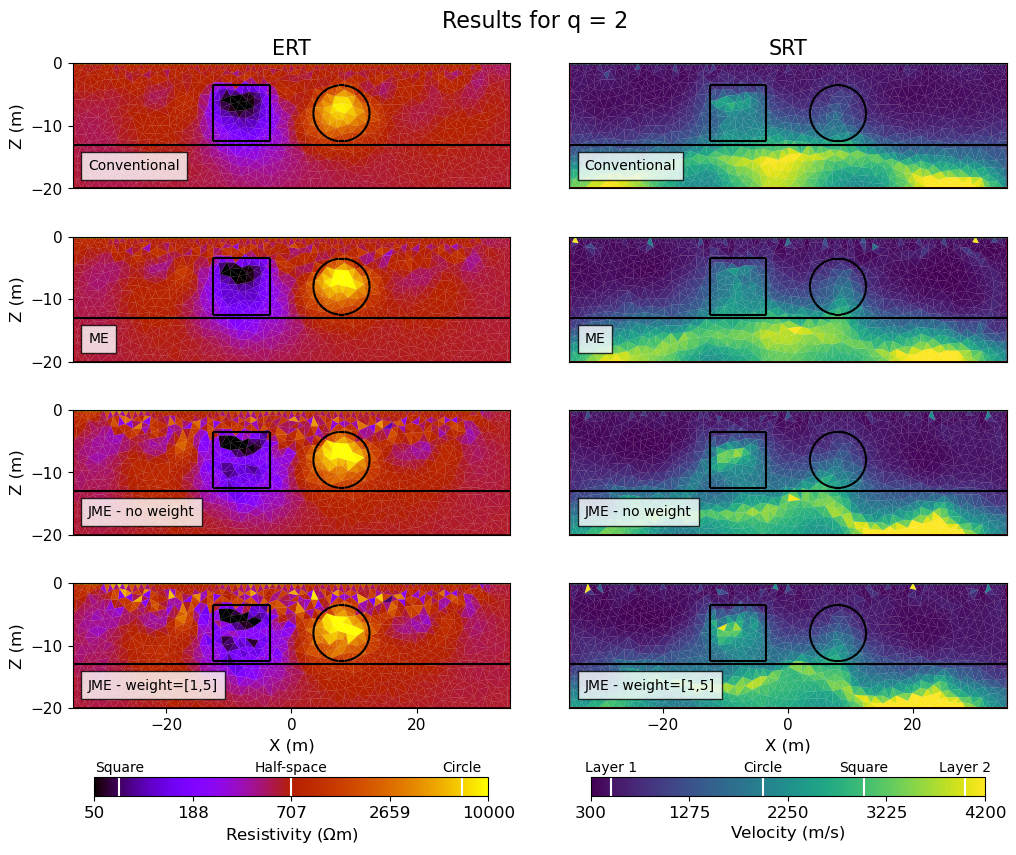

In [28]:
fig, ax, [cax1, cax2] = plotJointResultsComparison(invmesh, 
                                                   [r_est_con, r_est_me,r_est_jme,r_est_jmew], 
                                                   [v_est_con, v_est_me,v_est_jme,1/v_est_jmew], 
                                                   c_ert, c_srt, lim_ert, lim_srt, 
                                                   ['Conventional','ME','JME - no weight','JME - weight=[1,5]'], labels=True,
                                                   ert_marks=ert_marks, srt_marks=srt_marks, 
                                                   ert_label=ert_label, srt_label=srt_label, marks=True, 
                                                   figsize=(10,7))
for axis_ar in ax:
    for axis in axis_ar:
        pg.viewer.mpl.drawPLC(axis, geom, fillRegion=False)
        axis.set_xlim(-35,35)
        axis.set_ylim(-20,0)
fig.suptitle(f'Results for q = {q}',fontsize=16, x=0.51, y=1.05)
ax[0,0].set_title('ERT',fontsize=15)
ax[0,1].set_title('SRT',fontsize=15)
for a in ax[:,0]:
    a.set_ylabel('Z (m)', fontsize=12)
    a.set_yticks([-20,-10,0])
for a in ax[-1,:]:
    a.set_xlabel('X (m)', fontsize=12)
    a.set_xticks([-20,0,20])
    
cax2.set_xlabel(pg.unit('vel'), fontsize=12)
cax1.tick_params(labelsize=12)
cax1.set_xlabel(pg.unit('res'), fontsize=12)
cax2.tick_params(labelsize=12)
plt.savefig(path+f'Figures/Ch-3/Best_results_comp_{q}.pdf', bbox_inches='tight', dpi=600)